# Step 0. Modeling the DATA

**Before this you should read our README.md in the doc/dengue_docs/ directory, copies of ou source files are there too so take and put them in the climada SYSTEM_DIR, so that the code works.**

With Conversor class you can call the functions convert_datasus_data and convert_news_data, with the parameters: Source file name (name of the file which will be converted), treshold of severity (value between 0 and , which tells the code to ignore events below that threshold), boolean value which says that the events should be grouped by month when they happened if True or by month and city if False, maximum number of months which should be analised (for example if 5, only the first 5 months will be analised), end file name (file for the results).

**The end file should be a csv file.**

Examples:

Conversor.convert_news_data("dengue_hazzards_news.xlsx", 0, False, 12, "HazardNews.csv") -> Will take information from a file containing news data and change it so that it can be read and processed by climadaBR.

Conversor.convert_news_data("dengue_hazzards_news.xlsx", 0.1, True, 6) -> Is the same as the previous one but it will take 0.1 as a threshold for severity and eliminate events below that value, it will also group events only by month and consider just the first 6 months, january to june.

Conversor.convert_datasus_data('DENGUE2023.xlsx', True, 12, "HazardDatasus.csv") -> Will convert ou file downloaded from datasus. It has the same atributes as the above, except for severity threshold (the data does not have the severity atribute). You should refrain from changing the boolean value to false cause the data from datasus is usually too big to group by both city and month, it can make the process too slow.

In [1]:
from climada.climadaBR import *

Conversor.convert_datasus_data("DENGUE2023.xlsx", True, 12, "HazardDatasus.csv") #This is the usual configuration, the boolean value here should be true, cause the data is too massive
Conversor.convert_news_data("dengue_hazzards_news.xlsx", 0, False, 5, "HazardNews.csv") #This one is more flexible, the data is not too big

/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


       ID_MUNICIP  month     0
0          110001      1   148
1          110001      2    59
2          110001      3    25
3          110001      4    27
4          110001      5    22
...           ...    ...   ...
13598      530010      1  2803
13599      530010      2  3378
13600      530010      3  4437
13601      530010      4  4271
13602      530010      5  4268

[13603 rows x 3 columns]
      ID_MUNICIP  event1  event2  event3  event4  event5  n_events       date
0         110001   148.0    59.0    25.0    27.0    22.0         5 2023-01-15
1         110002    69.0    81.0    78.0    40.0    10.0         5 2023-02-15
2         110003    18.0    17.0    28.0     1.0     0.0         5 2023-03-15
3         110004   101.0   133.0   155.0    89.0    41.0         5 2023-04-15
4         110005    25.0    22.0    57.0    17.0    10.0         5 2023-05-15
...          ...     ...     ...     ...     ...     ...       ...        ...
4202      522200     1.0     3.0     2.0     3.0     2.0

# Step 1. Defining Exposures

Exposure describes the set of assets, people, livelihoods, infrastructures, etc. within an area of interest in terms of their geographic location, their value etc.; in brief - everything potentially exposed to hazards.

Using LitPop Exposures:
https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_LitPop.html


2024-10-22 13:18:45,099 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: BRA (76)...

2024-10-22 13:18:53,687 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-10-22 13:18:53,691 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-10-22 13:18:53,741 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-10-22 13:18:53,741 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-10-22 13:18:53,836 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-10-22 13:18:53,837 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-10-22 13:18:53,867 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Usin

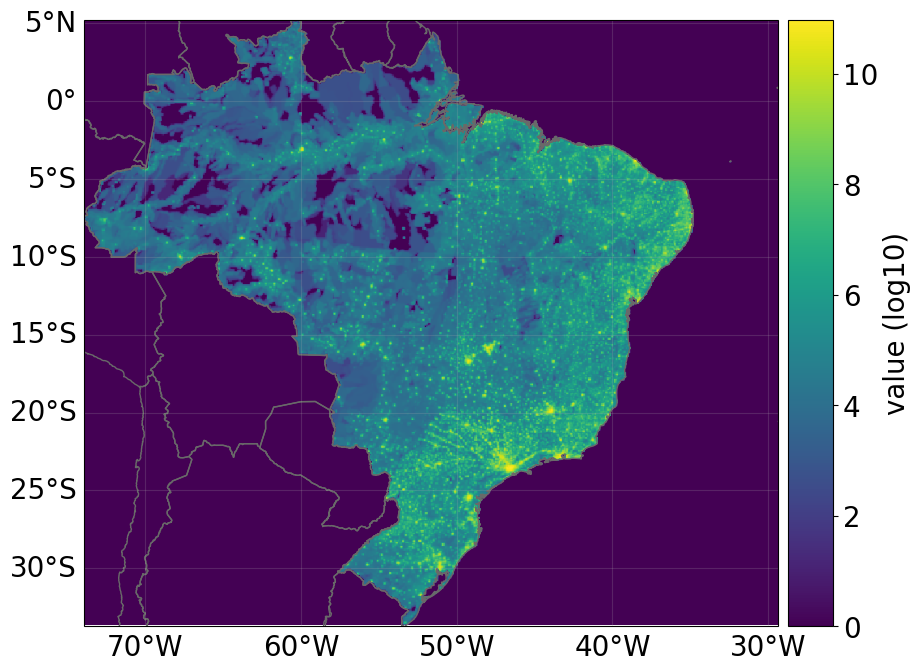

In [2]:
%matplotlib inline
from climada.climadaBR import *

climadabr = ClimadaBR()

# For this cell to work we need the gpw-v4-population-count-rev11_2020_30_sec_tif foulder.
# You can find out more about it in the LitPop tutorial. After downloading, you can copy it to the system
#  directory or to your preferred repository.
# If you are using gpw-v4-population-count-rev11_2020_30_sec_tif (NASA) in the climada system directory 
# "SYSTEM_DIR" you don't need any aditional arguments, but if it is in another directory you can include 
# the path by adding the argument: Path("/path/to/your/directory/").
# For example: climadabr.DefineExposures(['BRA'], 300, 'income_group', Path("/content/Climada_Workspace/climada_python/climada/data/"))
climadabr.DefineExposures(['BRA'], 300, 'income_group')

# Step 2. Defining Hazards

A hazard describes climate-related events such as storms, floods, droughts, or heat waves both in terms of probability of occurrence as well as physical intensity.

**IMPORTANT:** In our project, we will extend the hazards to include events generated by climate change, such as the growth of diseases, mosquito-borne vectors, impacts on crops, pollution, effects on the healthcare system, and any other range of events that we can model from news articles extracted from the portals of the country in question.


1
2
3
4
Loop  0
Loop  1
Loop  2
Loop  3
Loop  4
5


/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


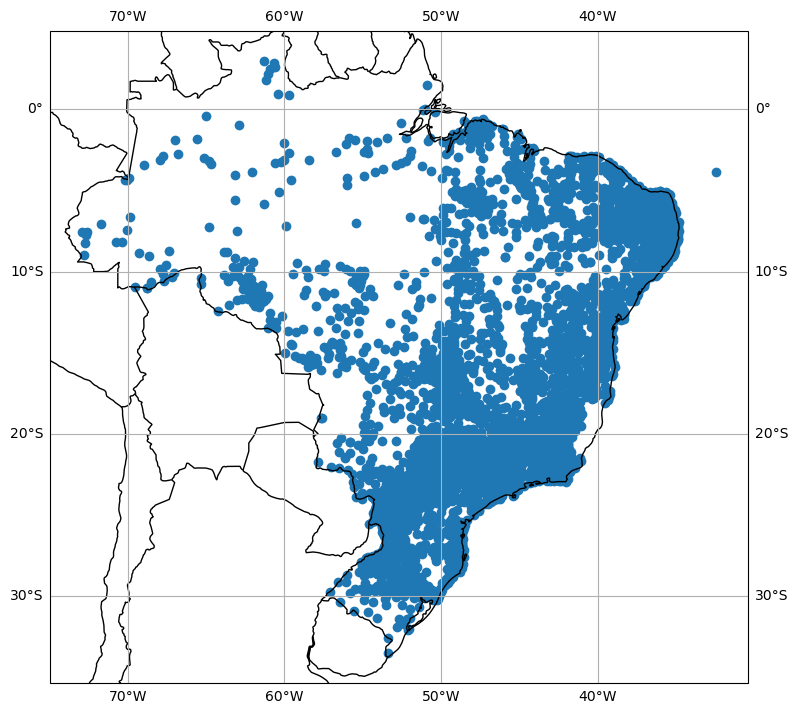

In [3]:
climadabr.HazardFromCSV("HazardDatasus.csv")

# Step 3. Defining Impact Functions

An impact function relates the percentage of damage in the exposure to the hazard intensity, also commonly referred to as a “vulnerability curve” in the modelling community. Every hazard and exposure types are characterized by an impact function.


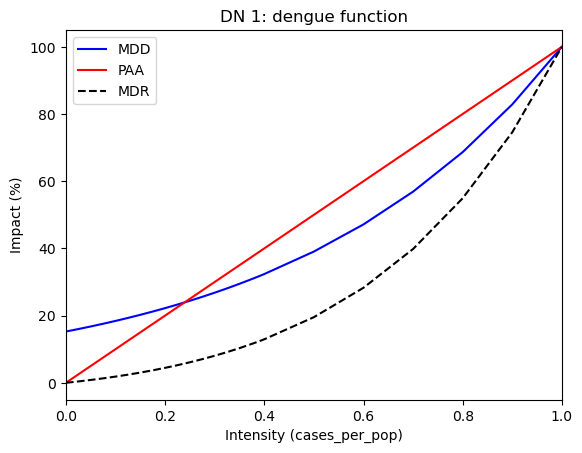

In [4]:
climadabr.ImpactFuncSetFromExcel("DengueFunc.xlsx")

# Step 4. Computing Impact

The impact is the combined effect of hazard events on a set of exposures mediated by a set of impact functions. By computing the impact for each event (historical and synthetic) and for each exposure value at each geographical location, the Impact provides different risk measures, such as the expected annual impact per exposure, the probable maximum impact for different return periods, and the total average annual impact.

2024-10-22 13:19:17,693 - climada.entity.exposures.base - INFO - Matching 101818 exposures with 4207 centroids.
2024-10-22 13:19:17,696 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2024-10-22 13:19:17,790 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 20282 coordinates.
2024-10-22 13:19:17,795 - climada.engine.impact_calc - INFO - Calculating impact for 242667 assets (>0) and 5 events.
2024-10-22 13:19:17,815 - climada.util.coordinates - INFO - Setting geometry points.
2024-10-22 13:19:17,971 - climada.util.coordinates - INFO - Raster from resolution 0.08333332999999854 to 0.08333332999999854.
Aggregated average annual impact: 915698299.0 $
2024-10-22 13:19:37,590 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specifi

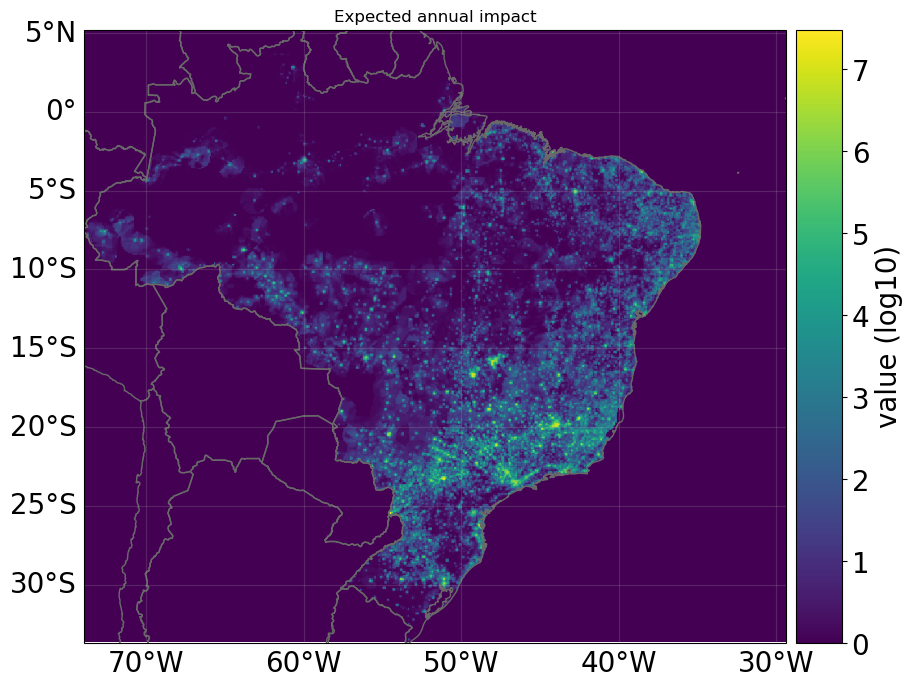

In [5]:
climadabr.ComputeImpact()